In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('C:\\Users\goyal\Datasets\spam.csv',encoding='ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [25]:
df.notnull()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,True,True,False,False,False
1,True,True,False,False,False
2,True,True,False,False,False
3,True,True,False,False,False
4,True,True,False,False,False
...,...,...,...,...,...
5567,True,True,False,False,False
5568,True,True,False,False,False
5569,True,True,False,False,False
5570,True,True,False,False,False


In [26]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [27]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
df['v1']=encoder.fit_transform(df['v1'])
df

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [28]:
df['v2'].value_counts()

Sorry, I'll call later                                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                                    12
Ok...                                                                                                                                                                                  10
Wen ur lovable bcums angry wid u, dnt take it seriously.. Coz being angry is d most childish n true way of showing deep affection, care n luv!.. kettoda manda... Have nice day da.     4
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...                     4
                                                                      

In [29]:
X=df['v2']
Y=df['v1']

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X= cv.fit_transform(X)
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,train_size=0.8)

In [31]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(Xtrain,Ytrain)
model.score(Xtest,Ytest)

0.979372197309417

In [32]:
Xtest=Xtest.toarray()
Xtrain=Xtrain.toarray()

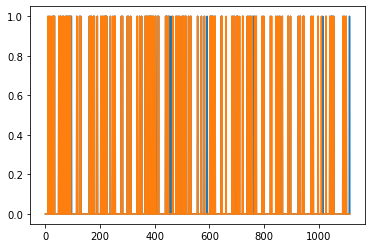

In [33]:
predict=model.predict(Xtest)
plt.plot(Ytest.values)
plt.plot(predict)
plt.show()

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(Ytest,predict)

0.979372197309417